# Interactive single Izhikevich neuron NeuroML example

To run this interactive Jupyter Notebook, please click on the rocket icon 🚀 in the top panel. For more information, please see {ref}`how to use this documentation <userdocs:usage:jupyterbooks>`.
Please uncomment the line below if you use the Google Colab (it does not include these packages by default).

In [1]:
#%pip install pyneuroml neuromllite NEURON

In [1]:
from neuroml import NeuroMLDocument
import neuroml.writers as writers
from neuroml.utils import component_factory
from neuroml.utils import validate_neuroml2
from pyneuroml import pynml
from pyneuroml.lems import LEMSSimulation
import numpy as np

## Declaring the NeuroML model

### Create a NeuroML document

In [2]:
nml_doc = component_factory(NeuroMLDocument, id="IzhSingleNeuron")

In [3]:
nml_doc.info()

Please see the NeuroML standard schema documentation at https://docs.neuroml.org/Userdocs/NeuroMLv2.html for more information.

Valid members for NeuroMLDocument are:
* sine_generators (class: SineGenerator, Optional)
* sine_generator_dls (class: SineGeneratorDL, Optional)
* ramp_generators (class: RampGenerator, Optional)
* ramp_generator_dls (class: RampGeneratorDL, Optional)
* compound_inputs (class: CompoundInput, Optional)
* compound_input_dls (class: CompoundInputDL, Optional)
* includes (class: IncludeType, Optional)
* voltage_clamps (class: VoltageClamp, Optional)
* extracellular_properties (class: ExtracellularProperties, Optional)
* voltage_clamp_triples (class: VoltageClampTriple, Optional)
* intracellular_properties (class: IntracellularProperties, Optional)
* spike_arrays (class: SpikeArray, Optional)
* morphology (class: Morphology, Optional)
* timed_synaptic_inputs (class: TimedSynapticInput, Optional)
* ion_channel (class: IonChannel, Optional)
* spike_generators (class

'Please see the NeuroML standard schema documentation at https://docs.neuroml.org/Userdocs/NeuroMLv2.html for more information.\n\nValid members for NeuroMLDocument are:\n* sine_generators (class: SineGenerator, Optional)\n* sine_generator_dls (class: SineGeneratorDL, Optional)\n* ramp_generators (class: RampGenerator, Optional)\n* ramp_generator_dls (class: RampGeneratorDL, Optional)\n* compound_inputs (class: CompoundInput, Optional)\n* compound_input_dls (class: CompoundInputDL, Optional)\n* includes (class: IncludeType, Optional)\n* voltage_clamps (class: VoltageClamp, Optional)\n* extracellular_properties (class: ExtracellularProperties, Optional)\n* voltage_clamp_triples (class: VoltageClampTriple, Optional)\n* intracellular_properties (class: IntracellularProperties, Optional)\n* spike_arrays (class: SpikeArray, Optional)\n* morphology (class: Morphology, Optional)\n* timed_synaptic_inputs (class: TimedSynapticInput, Optional)\n* ion_channel (class: IonChannel, Optional)\n* spik

In [4]:
nml_doc.info(True)

Please see the NeuroML standard schema documentation at https://docs.neuroml.org/Userdocs/NeuroMLv2.html for more information.

Valid members for NeuroMLDocument are:
* sine_generators (class: SineGenerator, Optional)
* sine_generator_dls (class: SineGeneratorDL, Optional)
* ramp_generators (class: RampGenerator, Optional)
* ramp_generator_dls (class: RampGeneratorDL, Optional)
* compound_inputs (class: CompoundInput, Optional)
* compound_input_dls (class: CompoundInputDL, Optional)
* includes (class: IncludeType, Optional)
* voltage_clamps (class: VoltageClamp, Optional)
* extracellular_properties (class: ExtracellularProperties, Optional)
* voltage_clamp_triples (class: VoltageClampTriple, Optional)
* intracellular_properties (class: IntracellularProperties, Optional)
* spike_arrays (class: SpikeArray, Optional)
* morphology (class: Morphology, Optional)
* timed_synaptic_inputs (class: TimedSynapticInput, Optional)
* ion_channel (class: IonChannel, Optional)
* spike_generators (class

"Please see the NeuroML standard schema documentation at https://docs.neuroml.org/Userdocs/NeuroMLv2.html for more information.\n\nValid members for NeuroMLDocument are:\n* sine_generators (class: SineGenerator, Optional)\n* sine_generator_dls (class: SineGeneratorDL, Optional)\n* ramp_generators (class: RampGenerator, Optional)\n* ramp_generator_dls (class: RampGeneratorDL, Optional)\n* compound_inputs (class: CompoundInput, Optional)\n* compound_input_dls (class: CompoundInputDL, Optional)\n* includes (class: IncludeType, Optional)\n* voltage_clamps (class: VoltageClamp, Optional)\n* extracellular_properties (class: ExtracellularProperties, Optional)\n* voltage_clamp_triples (class: VoltageClampTriple, Optional)\n* intracellular_properties (class: IntracellularProperties, Optional)\n* spike_arrays (class: SpikeArray, Optional)\n* morphology (class: Morphology, Optional)\n* timed_synaptic_inputs (class: TimedSynapticInput, Optional)\n* ion_channel (class: IonChannel, Optional)\n* spik

### Define the Izhikevich cell and add it to the model

In [5]:
izh0 = nml_doc.add(
    "Izhikevich2007Cell",
    id="izh2007RS0", v0="-60mV", C="100pF", k="0.7nS_per_mV", vr="-60mV",
    vt="-40mV", vpeak="35mV", a="0.03per_ms", b="-2nS", c="-50.0mV", d="100pA")
izh0.info(True)
nml_doc.info(show_contents=True)

Izhikevich2007Cell -- Cell based on the modified Izhikevich model in Izhikevich 2007, Dynamical systems in neuroscience, MIT Press

Please see the NeuroML standard schema documentation at https://docs.neuroml.org/Userdocs/NeuroMLv2.html for more information.

Valid members for Izhikevich2007Cell are:
* notes (class: xs:string, Optional)
* vpeak (class: Nml2Quantity_voltage, Required)
	* Contents ('ids'/<objects>): 35mV

* a (class: Nml2Quantity_pertime, Required)
	* Contents ('ids'/<objects>): 0.03per_ms

* C (class: Nml2Quantity_capacitance, Required)
	* Contents ('ids'/<objects>): 100pF

* b (class: Nml2Quantity_conductance, Required)
	* Contents ('ids'/<objects>): -2nS

* metaid (class: MetaId, Optional)
* c (class: Nml2Quantity_voltage, Required)
	* Contents ('ids'/<objects>): -50.0mV

* properties (class: Property, Optional)
* d (class: Nml2Quantity_current, Required)
	* Contents ('ids'/<objects>): 100pA

* v0 (class: Nml2Quantity_voltage, Required)
	* Contents ('ids'/<objects>): 

"Please see the NeuroML standard schema documentation at https://docs.neuroml.org/Userdocs/NeuroMLv2.html for more information.\n\nValid members for NeuroMLDocument are:\n* sine_generators (class: SineGenerator, Optional)\n* sine_generator_dls (class: SineGeneratorDL, Optional)\n* ramp_generators (class: RampGenerator, Optional)\n* ramp_generator_dls (class: RampGeneratorDL, Optional)\n* compound_inputs (class: CompoundInput, Optional)\n* compound_input_dls (class: CompoundInputDL, Optional)\n* includes (class: IncludeType, Optional)\n* voltage_clamps (class: VoltageClamp, Optional)\n* extracellular_properties (class: ExtracellularProperties, Optional)\n* voltage_clamp_triples (class: VoltageClampTriple, Optional)\n* intracellular_properties (class: IntracellularProperties, Optional)\n* spike_arrays (class: SpikeArray, Optional)\n* morphology (class: Morphology, Optional)\n* timed_synaptic_inputs (class: TimedSynapticInput, Optional)\n* ion_channel (class: IonChannel, Optional)\n* spik

### Create a network and add it to the model

In [6]:
net = nml_doc.add("Network", id="IzNet", validate=False)

### Create a population of defined cells and add it to the model

In [7]:
size0 = 1
pop0 = net.add("Population", id="IzhPop0", component=izh0.id, size=size0)
net.info()

Network -- Network containing:  **population** s ( potentially of type  **populationList** , and so specifying a list of cell  **location** s );  **projection** s ( with lists of  **connection** s ) and/or  **explicitConnection** s; and  **inputList** s ( with lists of  **input** s ) and/or  **explicitInput** s. Note: often in NeuroML this will be of type  **networkWithTemperature**  if there are temperature dependent elements ( e. g. ion channels ).

Please see the NeuroML standard schema documentation at https://docs.neuroml.org/Userdocs/NeuroMLv2.html for more information.

Valid members for Network are:
* synaptic_connections (class: SynapticConnection, Optional)
* projections (class: Projection, Optional)
* electrical_projections (class: ElectricalProjection, Optional)
* continuous_projections (class: ContinuousProjection, Optional)
* explicit_inputs (class: ExplicitInput, Optional)
* input_lists (class: InputList, Optional)
* id (class: NmlId, Required)
* metaid (class: MetaId, O

'Network -- Network containing:  **population** s ( potentially of type  **populationList** , and so specifying a list of cell  **location** s );  **projection** s ( with lists of  **connection** s ) and/or  **explicitConnection** s; and  **inputList** s ( with lists of  **input** s ) and/or  **explicitInput** s. Note: often in NeuroML this will be of type  **networkWithTemperature**  if there are temperature dependent elements ( e. g. ion channels ).\n\nPlease see the NeuroML standard schema documentation at https://docs.neuroml.org/Userdocs/NeuroMLv2.html for more information.\n\nValid members for Network are:\n* synaptic_connections (class: SynapticConnection, Optional)\n* projections (class: Projection, Optional)\n* electrical_projections (class: ElectricalProjection, Optional)\n* continuous_projections (class: ContinuousProjection, Optional)\n* explicit_inputs (class: ExplicitInput, Optional)\n* input_lists (class: InputList, Optional)\n* id (class: NmlId, Required)\n* metaid (cla

### Define an external stimulus and add it to the model

In [8]:
pg = nml_doc.add(
    "PulseGenerator",
    id="pulseGen_%i" % 0, delay="0ms", duration="1000ms",
    amplitude="0.07 nA"
)
exp_input = net.add("ExplicitInput", target="%s[%i]" % (pop0.id, 0), input=pg.id)

### Write the NeuroML model to a file

In [9]:
nml_file = 'izhikevich2007_single_cell_network.nml'
writers.NeuroMLWriter.write(nml_doc, nml_file)
print("Written network file to: " + nml_file)

Written network file to: izhikevich2007_single_cell_network.nml


### Validate the NeuroML model

In [10]:
validate_neuroml2(nml_file)

Validating izhikevich2007_single_cell_network.nml against /home/asinha/.local/share/virtualenvs/neuroml-dev/lib/python3.10/site-packages/neuroml/nml/NeuroML_v2.3.xsd
It's valid!


## Simulating the model

### Create a simulation instance of the model

In [11]:
simulation_id = "example-single-izhikevich2007cell-sim"
simulation = LEMSSimulation(sim_id=simulation_id,
                            duration=1000, dt=0.1, simulation_seed=123)
simulation.assign_simulation_target(net.id)
simulation.include_neuroml2_file(nml_file)

pyNeuroML >>> INFO - Loading NeuroML2 file: /home/asinha/Documents/02_Code/00_mine/NeuroML/documentation/source/Userdocs/NML2_examples/izhikevich2007_single_cell_network.nml


### Define the output file to store simulation outputs

Here, we record the neuron's membrane potential to the specified data file.

In [12]:
simulation.create_output_file(
    "output0", "%s.v.dat" % simulation_id
)
simulation.add_column_to_output_file("output0", 'IzhPop0[0]', 'IzhPop0[0]/v')

### Save the simulation to a file

In [13]:
lems_simulation_file = simulation.save_to_file()

## Run the simulation using the jNeuroML simulator

In [14]:
pynml.run_lems_with_jneuroml(
    lems_simulation_file, max_memory="2G", nogui=True, plot=False
)

pyNeuroML >>> INFO - Loading LEMS file: LEMS_example-single-izhikevich2007cell-sim.xml and running with jNeuroML
pyNeuroML >>> INFO - Executing: (java -Xmx2G  -Djava.awt.headless=true -jar  "/home/asinha/.local/share/virtualenvs/neuroml-dev/lib/python3.10/site-packages/pyneuroml/lib/jNeuroML-0.12.0-jar-with-dependencies.jar"  "LEMS_example-single-izhikevich2007cell-sim.xml"  -nogui -I '') in directory: .
pyNeuroML >>> INFO - Command completed. Output: 
  jNeuroML >>   jNeuroML v0.12.0
  jNeuroML >>  Loading: /home/asinha/Documents/02_Code/00_mine/NeuroML/documentation/source/Userdocs/NML2_examples/LEMS_example-single-izhikevich2007cell-sim.xml with jLEMS, NO GUI mode...
  jNeuroML >>  INFO Sep 15,2022 15:24  (INFO) Loading LEMS file from: /home/asinha/Documents/02_Code/00_mine/NeuroML/documentation/source/Userdocs/NML2_examples/LEMS_example-single-izhikevich2007cell-sim.xml
  jNeuroML >>  INFO Sep 15,2022 15:24  (INFO) Reading from: /home/asinha/Documents/02_Code/00_mine/NeuroML/docume

True

## Plot the recorded data

pyNeuroML >>> INFO - Generating plot: Membrane potential
/home/asinha/.local/share/virtualenvs/neuroml-dev/lib/python3.10/site-packages/pyneuroml/plot/Plot.py:186: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(


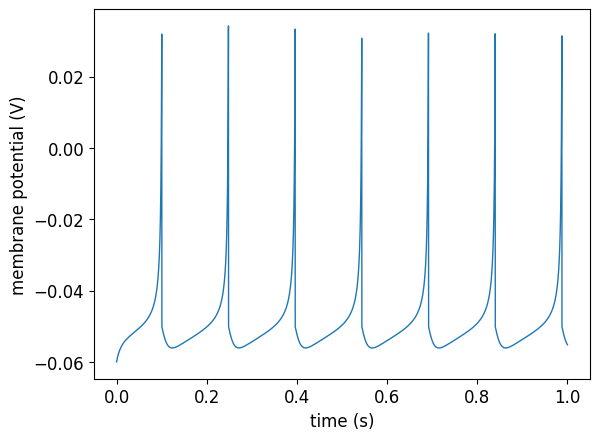

<AxesSubplot:xlabel='time (s)', ylabel='membrane potential (V)'>

In [15]:
# Load the data from the file and plot the graph for the membrane potential
# using the pynml generate_plot utility function.
data_array = np.loadtxt("%s.v.dat" % simulation_id)
pynml.generate_plot(
    [data_array[:, 0]], [data_array[:, 1]],
    "Membrane potential", show_plot_already=True,
    xaxis="time (s)", yaxis="membrane potential (V)"
)